## Welcome to the CCDeep！


**CCDeep，利用深度学习，来识别并追踪单细胞的周期变化，可用于各种细胞的time laps周期数据分析，也可应用于单张图片的分析工作，其使用方法简单，可扩展性高，并且针对不同的细胞类群，只需要提供少量样本，即可迁移应用。在使用CCDeep前，请首先了解本package的结构：此package包含了两个需要训练的模块，一个是用于做图像分割的模块，另一个是用于识别细胞周期的模块，如果是从头开始，需要用户训练这两个模块，或者也可以采用我们预训练的模块。训练方法参见[这里](./example/training.ipynb)。**

### 在开始使用前，您需要克隆我们的仓库到本地的合适位置，例如克隆到`D:\CCDeep`:

`git clone https://github.com/frozenleaves/CCDeep.git D:/CCDeep`

配置好环境以后，利用我们提供的预训练模型，就可以开始正式运行example了，环境配置方法参见我们的[`README`](https://github.com/frozenleaves/CCDeep#readme)文件

请[下载](https://github.com/frozenleaves/CCDeep/releases/tag/v1.2.1)示例dic和pcna图片，然后将其移动到example/images。

我们的package提供了main.py和train.py两个用户调用文件，其中main.py是主要的图片处理与分析程序，train.py用来训练相关模型。

`main.py`有以下参数：

`-p` or `--pcna`: pcna图像路径，为必选参数。

`-bf` or `--bf`: dic明场图像路径，为必选参数。

`-o` or `--output`: 图像分割识别后，json标注文件的输出路径，为可选参数，如果不提供，默认输出在当前目录，输出文件名与pcna图像文件名一致。

`-t` or `--track`: 是否追踪细胞周期变化过程，为可选参数，如果不调用-t则不进行追踪，否则追踪并输出相应的结果。*此参数不需要提供任何值*。

`-js` or `--js`:用于追踪细胞周期的json标注文件所在路径，如果调用了`-ns`则本参数为必选参数，否则不用提供。

`-ot` or `--ot`: track的结果输出路径，可选参数，默认与json标注文件同目录。

`-ns` or `--ns`:是否进行图像分割，如果您有已经标注好的json文件，只想做细胞周期的track，您不必再次执行图像分割和识别这一过程，可以调用`-ns`，表示不进行图像分割。


现在，您可以尝试执行一次完整的分析流程了：

`python main.py -pcna ./examples/images/example_of_mcy.tif -bf ./examples/images/example_of_dic.tif -o ./example.json -t -ot ./track_result` 

-----

### Input image

我们的输入图像可以是一个具有时间轴的图像序列，也可以是单张灰度图

In [1]:
from skimage import io as io
import matplotlib.pyplot as plt
import os

In [2]:
print(os.getcwd())

E:\jupyter


In [3]:
pcna = io.imread('./examples/images/example_of_mcy.tif')
dic = io.imread('./examples/images/example_of_dic.tif')

#### pcna和dic是相同大小的两组图像序列, CCDeep主要的信息均来源于这两个通道所提供的图像。该图片是由共聚焦显微镜在20X的放大倍率下，经过48小时连续拍摄后，截取的一段序列，图像为16位灰度图，大小为2048x2048

In [4]:
print("shape of pcna: ", pcna.shape)
print("shape of dic: ", dic.shape)

shape of pcna:  (100, 2048, 2048)
shape of dic:  (100, 2048, 2048)


In [5]:
print(pcna.dtype)

uint16


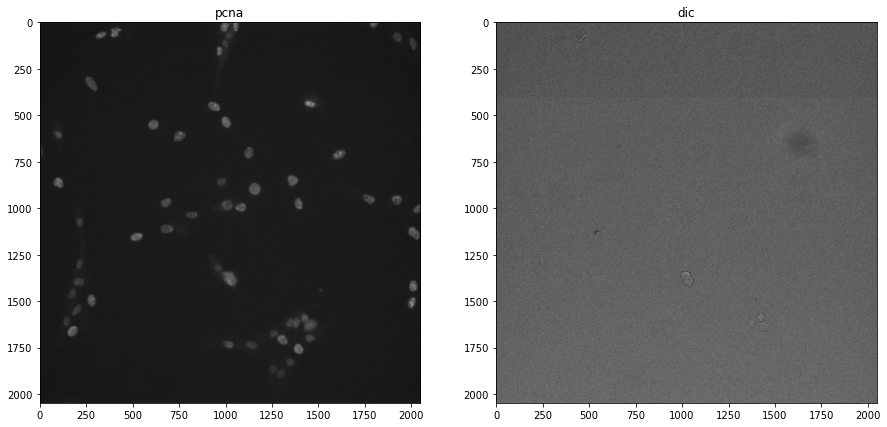

In [11]:
fig ,ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].set_title('pcna')
ax[1].set_title('dic')
ax[0].imshow(pcna[15, :, :], cmap='gray')
ax[1].imshow(dic[15, :, :], cmap='gray')

CCDeep采用mcy和dic双通道训练细胞周期分类识别模型，采用mcy单通道训练单细胞分割模型，不需要进行额外的操作，同时也支持8位灰度图的输入

-----

细胞周期分割识别后，可以利用via进行可视化:

1. 打开[VIA](https://annotate.officialstatistics.org/)在线工具

2. 选择**Annotation** --> **Import Annotations (from json)**

3. 选择输出的json文件

4. 选择 **Add Files**, 添加相应的图片。*注：VIA不能识读tif文件，请将tif转化为png再添加！*


![visualization](./images/segment-demo.jpg)

### Tracking result

如果调用了`-t`或者`--track`参数，会有3个csv输出文件：

- refined.csv: 记录了timelaps的详细细胞周期信息，是最关键的输出。

- phase.csv: 不同细胞周期细胞的一个概览表。

- tracked.csv: 原始追踪信息，主要用作debug。

In [12]:
import pandas as pd

tracks = pd.read_csv('./examples/track/refined.csv')
tracks.iloc[0:5,:]

,frame,trackId,lineageId,parentTrackId,Center_of_the_object_1,Center_of_the_object_0,predicted_class,Probability of G1/G2,Probability of S,Probability of M,continuous_label,major_axis,minor_axis,mean_intensity,emerging,background_mean,BF_mean,BF_std,resolved_class
0,0,1,1,0,13.680228,1823.030919,G1/G2,1.0,0.0,0.0,1,50.629417,31.900122,224.590724,0,55.296367,104.167616,52.605502,G2*
1,1,1,1,0,11.978826,1826.228104,G1/G2,1.0,0.0,0.0,1,49.970364,27.710900,220.412897,0,56.049892,99.536092,50.736941,G2*
2,2,1,1,0,11.161867,1822.553128,G1/G2,1.0,0.0,0.0,1,52.110482,25.863624,216.237339,0,56.776729,101.981132,51.154115,G2*
3,3,1,1,0,11.184000,1820.389000,G1/G2,1.0,0.0,0.0,1,51.817182,25.653709,216.343000,0,55.635911,106.725000,53.537925,G2*
4,4,1,1,0,10.878942,1815.074262,G1/G2,1.0,0.0,0.0,1,52.465444,24.978334,213.851475,0,56.872699,103.457782,51.281899,G2*


In [13]:
phase = pd.read_csv('./examples/track/phase.csv')
phase.iloc[0:5,:]

,track,type,length,lin_length,arrest,G1,S,M,G2,parent,imprecise_exit
0,1,arrest-G2,22,22,22.0,NaN,NaN,NaN,NaN,0,0
1,2,arrest-G2,27,27,27.0,NaN,NaN,NaN,NaN,0,0
2,3,normal,57,385,NaN,NaN,NaN,NaN,>51,0,0
3,4,arrest-G2,16,16,16.0,NaN,NaN,NaN,NaN,0,0
4,5,normal,385,385,NaN,>236,111,NaN,>38,0,0


-----

### visualization

The __tracked object table__ is directly importable into __Fiji__ through __[TrackMate CSV Importer](https://github.com/tinevez/TrackMate-CSVImporter)__ (installation required).

1. Load `example_of_dic.tif` to Fiji through dragging it to the tool bar or __File > Open__. Enhance the contrast if required. 

&emsp; &emsp;You may also use the composite image generated in the above __Step 2__.


2. Invert t and z axis of the image if necessary, through __Image > Properties__. 

&emsp; &emsp; In this example, set _frame (t)_ to 66 and _slice (z)_ to 1.


3. Open TrackMate CSV Importer through __Plugin > Tracking > TrackMate CSV Importer__.

4. Config parameters as the following (see screenshot below):
    <img src="assets/vis_guide_0.png"  alt="config trackmate csv importer" width=800/>
    
    - Compute all features? = unchecked; Import tracks? = tracked
    - Radius: choose one comfortable to the cell size, in this case is 50 pixels
    - __X/Y column: Center_of_the_object_0/1__
    - __Z column: "Don't use"__
    - Frame column: frame
    - Track column: trackId
    - Name column: name
    - Quality column & ID column: "Don't use"
    
    
5. Click 'Import', and then adjust GUI
    - check "Display spot names"
    - under "Track display mode", choose "Show local tracks"
    
Each object is labeled with its "name", which is __`trackId-(parentTrackId)-resolved phase`__.

------

**详细内容请参照下面的指南：**

1. 数据准备：

    a. [图像分割数据准备](./prepare-segment-data.ipynb)
    
    b. [细胞周期识别数据准备](./prepare-classify-data.ipynb)
    
 
2. 训练模型：

     a. [训练图像分割模型]('./train-segment.ipynb')
     
     b. [训练细胞周期识别模型]('./train-classify.ipynb')
     

3. [预测]('./prediction.ipynb')